In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("training.csv")
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [29]:
old_main_df = df[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Statistical_report', 'Result']]

In [30]:
old_main_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,-1,-1,0,-1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,1,-1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,-1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,1,-1,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,0,-1,-1,-1,1,1,-1,-1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,0,1,1,1,1,1,1,-1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,0,-1,1,1,1,1,1,-1,1,-1


In [31]:
def convertEncodingtoPositive(df):
    count = 0
    mapping = {-1:2, 0:0, 1:1}
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            df.loc[i][j] = mapping[df.loc[i][j]]

    return df

main_df = convertEncodingtoPositive(old_main_df)
main_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,...,0,1,1,1,2,2,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,...,0,1,1,1,2,2,0,2,1,2
2,1,0,1,1,1,2,2,2,2,1,...,0,1,1,1,1,2,1,2,2,2
3,1,0,1,1,1,2,2,2,1,1,...,0,1,1,1,2,2,1,2,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,...,0,2,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,2,...,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,0,1,1,1,1,1,1,2,1,2
11053,2,2,1,1,1,2,2,2,1,2,...,0,2,1,1,1,1,1,2,1,2


In [32]:
main_df.to_csv("new-data.csv", index= False)

In [33]:
main_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,...,0,1,1,1,2,2,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,...,0,1,1,1,2,2,0,2,1,2
2,1,0,1,1,1,2,2,2,2,1,...,0,1,1,1,1,2,1,2,2,2
3,1,0,1,1,1,2,2,2,1,1,...,0,1,1,1,2,2,1,2,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,...,0,2,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,2,...,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,0,1,1,1,1,1,1,2,1,2
11053,2,2,1,1,1,2,2,2,1,2,...,0,2,1,1,1,1,1,2,1,2


In [34]:
data_labels = main_df.iloc[:,:25]
target_labels = main_df.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split

data_label_train, data_label_test, target_label_train, target_label_test = train_test_split(data_labels, target_labels, test_size=0.2, random_state=7, stratify=target_labels)

data_label_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Submitting_to_email,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report
9303,2,2,1,1,1,2,0,0,2,1,...,1,0,1,1,1,1,1,0,2,1
3494,1,2,1,1,1,2,2,2,1,1,...,1,0,1,1,1,1,2,2,2,2
10003,2,2,1,2,2,1,1,1,1,2,...,2,1,2,1,1,2,1,0,2,1
5313,2,1,1,1,1,1,1,1,2,1,...,1,0,1,1,1,1,1,2,2,1
4903,1,2,1,1,1,2,2,2,2,1,...,1,0,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,1,1,1,1,1,2,1,1,2,1,...,1,0,1,1,1,1,1,1,1,1
2112,1,2,1,1,1,2,2,2,1,1,...,1,0,1,1,1,1,2,1,2,1
5630,2,1,2,2,2,2,2,1,2,1,...,1,0,1,1,1,1,2,1,2,1
1692,1,2,1,1,1,1,2,1,1,2,...,2,0,1,1,2,2,1,2,2,1


In [36]:
main_df = pd.read_csv("new-data.csv")

In [37]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [38]:
data_label_train = data_label_train.to_numpy()
data_label_test = data_label_test.to_numpy()
target_label_train  = target_label_train.to_numpy()
target_label_test = target_label_test.to_numpy()

In [39]:
import pickle
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
data_label_train_one_hot = encoder.fit_transform(data_label_train)
data_label_test_one_hot = encoder.transform(data_label_test)
pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB


In [41]:
svm_clf = SVC(probability=True) 
dt_clf = DecisionTreeClassifier()
nb_clf = CategoricalNB()


voting_clf = VotingClassifier(
    estimators=[('svm',svm_clf), ('dt',dt_clf), ('nb',nb_clf)],
    voting='soft'
)

voting_clf.fit(data_label_train_one_hot, target_label_train)



VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', CategoricalNB())],
                 voting='soft')

In [42]:
tp, fn, fp, tn = confusion_matrix(target_label_train, voting_clf.predict(data_label_train_one_hot)).ravel()    
accuracy = (tn+tp)/(fp+fn+tp+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
f1 = 2*precision*recall/(precision + recall)

print(accuracy, precision, recall, fpr, f1)

0.9668701944821347 0.9632073585282943 0.9778725131952903 0.04696273608984176 0.9704845371209831


/home/sumit/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
<ipython-input-63-6f2f157ce3ed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-63-6f2f157ce3ed>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


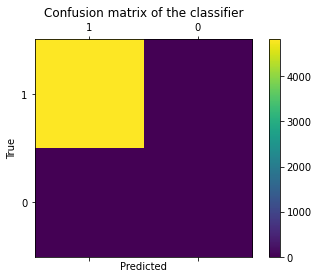

In [63]:
def plot_cm(y_val, y_pred):
  labels = [1, 0]
  cm = confusion_matrix(y_val, y_pred, labels)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')


plot_cm(target_label_train, voting_clf.predict(data_label_train_one_hot))

In [43]:
one_hot_enc = pickle.load(open("/home/sumit/dev/python/phishing/One_Hot_Encoder", "rb"))

In [44]:
def encode_features(features):
    new_features  = []
    for i in features:
        if i==1:
            new_features.append(i)
        elif i==-1:
            new_features.append(2)
        else:
            new_features.append(2)
    return new_features






In [47]:

import features as f
features = f.extract_features("https://olx.pl-id30922314.xyz/getpay/53265199")
features = encode_features(features)
transformed_point = one_hot_enc.transform(np.array(features).reshape(1, -1))
print(voting_clf.predict(transformed_point))

https://olx.pl-id30922314.xyz/getpay/532651999	
extracted feature 1
extracted feature 2
extracted feature 3
extracted feature 4
extracted feature 5
extracted feature 6
Let's
extracted feature 7
extracted feature 10
extracted feature 11
extracted feature 12
extracted feature 13
extracted feature 14
extracted feature 15
extracted feature 16
extracted feature 17
extracted feature 18
extracted feature 19
extracted feature 20
extracted feature 21
extracted feature 22
extracted feature 23
extracted feature 24
extracted feature 25
[2]


In [48]:
import pickle
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(voting_clf, file)

In [49]:
voting = pickle.load(open('model.pkl', 'rb'))

In [51]:
features = f.extract_features("https://olx.pl-id30922314.xyz/getpay/53265199")
features = encode_features(features)
transformed_point = one_hot_enc.transform(np.array(features).reshape(1, -1))
pred = voting.predict(transformed_point)
print(pred)

https://olx.pl-id30922314.xyz/getpay/53265199
extracted feature 1
extracted feature 2
extracted feature 3
extracted feature 4
extracted feature 5
extracted feature 6
Let's
extracted feature 7
extracted feature 10
extracted feature 11
extracted feature 12
extracted feature 13
extracted feature 14
extracted feature 15
extracted feature 16
extracted feature 17
extracted feature 18
extracted feature 19
extracted feature 20
extracted feature 21
extracted feature 22
extracted feature 23
extracted feature 24
extracted feature 25
[2]


2